In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

%matplotlib inline

In [2]:
data = pd.read_csv('diemthi.csv')
data.head()

,Số báo danh,Họ và tên,Ngày sinh,Trường,Điểm Khuyến khích,Ngữ Văn,Tiếng Anh,Toán Tự Luận,Toán Trắc Nghiệm,Tổng toán,Môn Chuyên,Tổng Chuyên,Tổng đại trà
0,.,.,.,.,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,020001,TRẦN HUỆ AN,02/01/2007,THPT HÀN THUYÊN,0.0,8.00,8.5,4.0,3.2,7.2,6.0,35.7,38.9
2,020002,TRỊNH XUÂN AN,04/06/2007,THPT HÀN THUYÊN,0.0,8.00,8.5,4.5,3.8,8.3,0.0,0.0,39.1
3,020003,CHU HUYỀN ANH,28/02/2007,THPT HÀN THUYÊN,0.0,7.00,8.5,5.0,4.0,9.0,0.0,0.0,41.5
4,020004,HOÀNG TRUNG ANH,17/12/2007,THPT HÀN THUYÊN,0.0,4.75,9.5,4.5,3.2,7.7,0.0,0.0,34.4


In [3]:
data.drop(0,axis = 0,inplace = True)
data.isna().sum() # Kiểm tra DataFrame có tồn tại giá tị null

,0
Số báo danh,0
Họ và tên,0
Ngày sinh,0
Trường,0
Điểm Khuyến khích,0
Ngữ Văn,0
Tiếng Anh,0
Toán Tự Luận,0
Toán Trắc Nghiệm,0
Tổng toán,0


#Toán

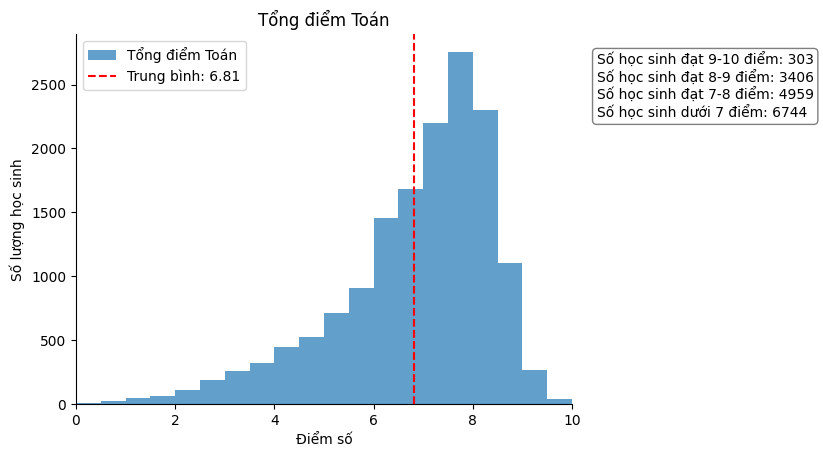

In [46]:
data['Tổng điểm Toán'] = data['Toán Tự Luận'] + data['Toán Trắc Nghiệm']


mean_score = data['Tổng điểm Toán'].mean()
count_9_10 = data[(data['Tổng điểm Toán'] >= 9) & (data['Tổng điểm Toán'] <= 10)].shape[0]
count_8_9 = data[(data['Tổng điểm Toán'] >= 8) & (data['Tổng điểm Toán'] < 9)].shape[0]
count_7_8 = data[(data['Tổng điểm Toán'] >= 7) & (data['Tổng điểm Toán'] < 8)].shape[0]
count_below_7 = data[data['Tổng điểm Toán'] < 7].shape[0]


ax = data['Tổng điểm Toán'].plot(kind='hist', bins=20, title='Tổng điểm Toán', alpha=0.7, range=(0, 10))
plt.gca().spines[['top', 'right']].set_visible(False)

mean_score = data['Tổng điểm Toán'].mean()
plt.axvline(mean_score, color='r', linestyle='--', label=f'Trung bình: {mean_score:.2f}')
ax.set_xlabel('Điểm số')
ax.set_ylabel('Số lượng học sinh')


textstr = '\n'.join((
    f'Số học sinh đạt 9-10 điểm: {count_9_10}',
    f'Số học sinh đạt 8-9 điểm: {count_8_9}',
    f'Số học sinh đạt 7-8 điểm: {count_7_8}',
    f'Số học sinh dưới 7 điểm: {count_below_7}'
))


props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.gca().text(1.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', bbox=props)
plt.xlim(0, 10)
plt.legend()
plt.show()


In [41]:
top_math = 5
print("=== Học sinh có điểm Toán cao nhất ===")
top_students_math = data.nlargest(top_math, 'Tổng điểm Toán')
print(top_students_math[['Họ và tên', 'Tổng điểm Toán']])

=== Học sinh có điểm Toán cao nhất ===
                 Họ và tên  Tổng điểm Toán
10842          LÊ ĐĂNG ĐẠI            10.0
10973        NGÔ PHÚC HƯNG            10.0
13623      NGUYỄN TIẾN ĐỨC            10.0
820          NGUYỄN HUY TÚ             9.8
8957   NGUYỄN HỮU TUẤN ANH             9.8


#Tiếng Anh

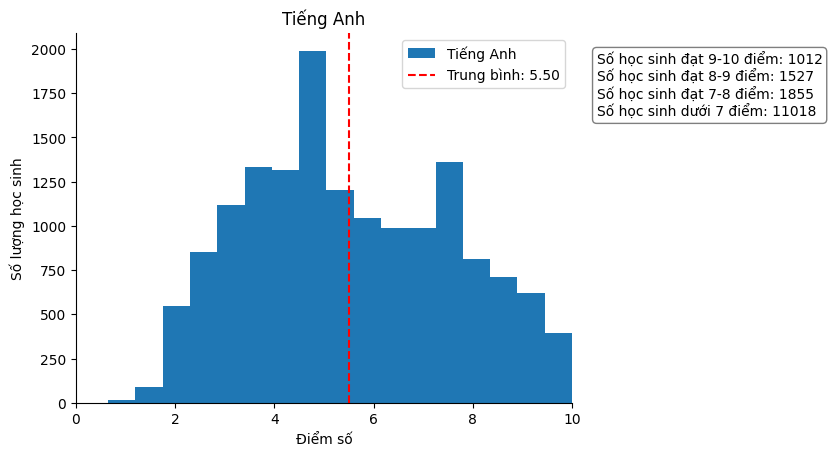

In [50]:
mean_score = data['Tiếng Anh'].mean()
count_9_10 = data[(data['Tiếng Anh'] >= 9) & (data['Tiếng Anh'] <= 10)].shape[0]
count_8_9 = data[(data['Tiếng Anh'] >= 8) & (data['Tiếng Anh'] < 9)].shape[0]
count_7_8 = data[(data['Tiếng Anh'] >= 7) & (data['Tiếng Anh'] < 8)].shape[0]
count_below_7 = data[data['Tiếng Anh'] < 7].shape[0]

# Vẽ biểu đồ cho 'Tiếng Anh'
ax = data['Tiếng Anh'].plot(kind='hist', bins=20, title='Tiếng Anh')
plt.gca().spines[['top', 'right',]].set_visible(False)
mean_score_english = data['Tiếng Anh'].mean()
plt.axvline(mean_score_english, color='r', linestyle='--', label=f'Trung bình: {mean_score_english:.2f}')

ax.set_xlabel('Điểm số')
ax.set_ylabel('Số lượng học sinh')


textstr = '\n'.join((
    f'Số học sinh đạt 9-10 điểm: {count_9_10}',
    f'Số học sinh đạt 8-9 điểm: {count_8_9}',
    f'Số học sinh đạt 7-8 điểm: {count_7_8}',
    f'Số học sinh dưới 7 điểm: {count_below_7}'
))


props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.gca().text(1.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', bbox=props)


plt.xlim(0, 10)
plt.legend()
plt.show()


In [42]:
top_eng = 5
print("\n=== Học sinh có điểm Tiếng Anh cao nhất ===")
top_students_english = data.nlargest(top_eng, 'Tiếng Anh')
print(top_students_english[['Họ và tên', 'Tiếng Anh']])


=== Học sinh có điểm Tiếng Anh cao nhất ===
               Họ và tên  Tiếng Anh
54     NGUYỄN PHƯƠNG ANH       10.0
58   TRẦN THỊ PHƯƠNG ANH       10.0
111           BÙI HÀ CHI       10.0
170     HOÀNG TUẤN DƯƠNG       10.0
171     NGUYỄN ÁNH DƯƠNG       10.0


#Ngữ Văn

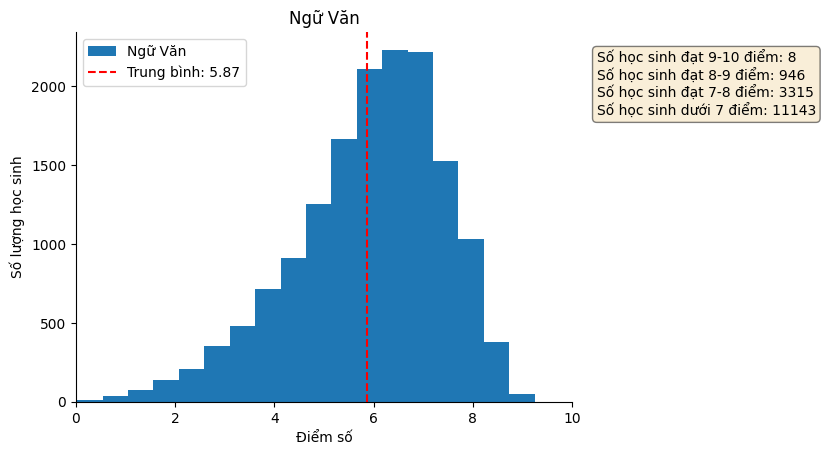

In [52]:
mean_score = data['Ngữ Văn'].mean()
count_9_10 = data[(data['Ngữ Văn'] >= 9) & (data['Ngữ Văn'] <= 10)].shape[0]
count_8_9 = data[(data['Ngữ Văn'] >= 8) & (data['Ngữ Văn'] < 9)].shape[0]
count_7_8 = data[(data['Ngữ Văn'] >= 7) & (data['Ngữ Văn'] < 8)].shape[0]
count_below_7 = data[data['Ngữ Văn'] < 7].shape[0]


ax = data['Ngữ Văn'].plot(kind='hist', bins=20, title='Ngữ Văn')
plt.gca().spines[['top', 'right',]].set_visible(False)
mean_score_van = data['Ngữ Văn'].mean()
plt.axvline(mean_score_van, color='r', linestyle='--', label=f'Trung bình: {mean_score_van:.2f}')
ax.set_xlabel('Điểm số')
ax.set_ylabel('Số lượng học sinh')


textstr = '\n'.join((
    f'Số học sinh đạt 9-10 điểm: {count_9_10}',
    f'Số học sinh đạt 8-9 điểm: {count_8_9}',
    f'Số học sinh đạt 7-8 điểm: {count_7_8}',
    f'Số học sinh dưới 7 điểm: {count_below_7}'
))


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(1.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', bbox=props)


plt.xlim(0, 10)
plt.legend()
plt.show()


In [43]:
top_v = 5
print("\n=== Học sinh có điểm Ngữ Văn cao nhất ===")
top_students_van = data.nlargest(top_v, 'Ngữ Văn')
print(top_students_van[['Họ và tên', 'Ngữ Văn']])


=== Học sinh có điểm Ngữ Văn cao nhất ===
                   Họ và tên  Ngữ Văn
1876      NGUYỄN THỊ MỸ LINH     9.25
451         LẠI THỊ HẢI LINH     9.00
949           NGUYỄN VÂN ANH     9.00
1092         VŨ PHƯƠNG HUYỀN     9.00
1882  NGUYỄN THỊ PHƯƠNG LINH     9.00


# Phân tích phổ điểm trường THPT Hàn THuyên

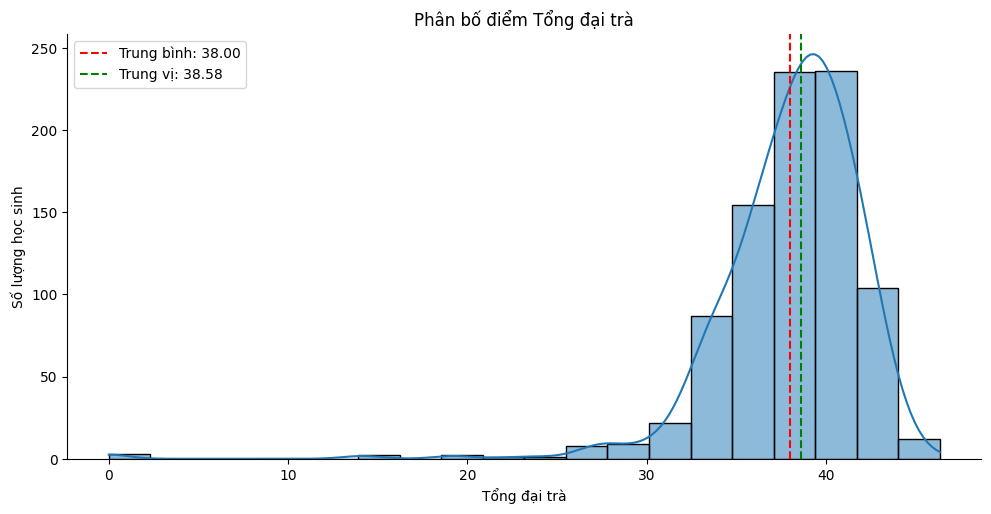

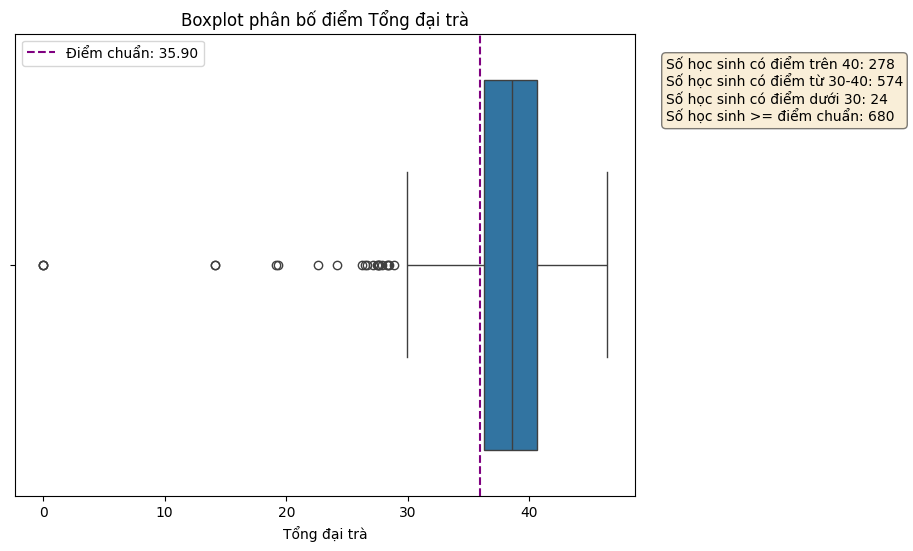

In [61]:
df = data[data['Trường'] == 'THPT HÀN THUYÊN']
mean_score = df["Tổng đại trà"].mean()
median_score = df["Tổng đại trà"].median()
std_score = df["Tổng đại trà"].std()


sns.displot(x=df["Tổng đại trà"], kde=True, bins=20, height=5, aspect=2)
plt.axvline(mean_score, color='r', linestyle='--', label=f'Trung bình: {mean_score:.2f}')
plt.axvline(median_score, color='g', linestyle='--', label=f'Trung vị: {median_score:.2f}')
plt.legend()
plt.title('Phân bố điểm Tổng đại trà')
plt.xlabel('Tổng đại trà')
plt.ylabel('Số lượng học sinh')
plt.show()


num_students_over_40 = df[df["Tổng đại trà"] > 40].shape[0]
num_students_30_40 = df[(df["Tổng đại trà"] >= 30) & (df["Tổng đại trà"] <= 40)].shape[0]
num_students_below_30 = df[df["Tổng đại trà"] < 30].shape[0]


cutoff_score = df["Tổng đại trà"].sort_values(ascending=False).iloc[674]
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Tổng đại trà"])
plt.axvline(cutoff_score, color='purple', linestyle='--', label=f'Điểm chuẩn: {cutoff_score:.2f}')
plt.title('Boxplot phân bố điểm Tổng đại trà')
plt.xlabel('Tổng đại trà')


textstr = '\n'.join((
    f'Số học sinh có điểm trên 40: {num_students_over_40}',
    f'Số học sinh có điểm từ 30-40: {num_students_30_40}',
    f'Số học sinh có điểm dưới 30: {num_students_below_30}',
    f'Số học sinh >= điểm chuẩn: {df[df["Tổng đại trà"] >= cutoff_score].shape[0]}'
))


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(1.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', bbox=props)

plt.legend()
plt.show()


In [62]:
data[data['Tổng đại trà'] == data['Tổng đại trà'].max()] # Tìm học sinh có số điểm tổng Đại Trà cao nhất

,Số báo danh,Họ và tên,Ngày sinh,Trường,Điểm Khuyến khích,Ngữ Văn,Tiếng Anh,Toán Tự Luận,Toán Trắc Nghiệm,Tổng toán,Môn Chuyên,Tổng Chuyên,Tổng đại trà,Tổng điểm Toán
820,020820,NGUYỄN HUY TÚ,21/02/2007,THPT HÀN THUYÊN,0.0,8.75,9.25,6.0,3.8,9.8,8.5,44.8,46.35,9.8


In [55]:
top_n = 5
print(f"=== Học sinh có tổng điểm đại trà cao nhất ({top_n} học sinh) ===")
top_students_total = data.nlargest(top_n, 'Tổng đại trà')
print(top_students_total[['Họ và tên', 'Tổng đại trà']])


=== Học sinh có tổng điểm đại trà cao nhất (5 học sinh) ===
                    Họ và tên  Tổng đại trà
820             NGUYỄN HUY TÚ         46.35
10972         NGUYỄN VĂN HÙNG         45.75
10973           NGÔ PHÚC HƯNG         45.75
6810   NGUYỄN ĐẶNG ANH PHƯƠNG         45.50
6811           NGÔ LAN PHƯƠNG         45.50
